<h1>Analysis of Azog C1 chip: Bloch oscillations with Signal Hound</h1>
Online analysis script used to pre-analyse the data collected during the cooldown of the chip.

In [2]:
sample_name = 'azog_c1'                    # name of the chip in the fridge
date_suffixe = '20220201'
user = 'ncr'                               # who is performing measurements

<h3>Basic imports</h3>

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
from resonator_tools import circuit

import qcodes as qc
from qcodes import initialise_database, load_by_run_spec
from qcodes.dataset.plotting import plot_by_id

import scipy.optimize

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

<h2>Data analysis and plotting</h2>

In [6]:
db_name = '20220203_ncr_spectrumanalyzer_BO_v1.db'   # name of the database
db_path  = os.path.join(r'D:\QMET' + '\\' + sample_name + '\\',db_name)

qc.initialise_or_create_database_at(db_path)

<h4>Spectrum as a function of MW pump power </h4>

In [49]:
# loading vna data
RUN_ID = 1
dataset = qc.load_by_run_spec(captured_run_id=RUN_ID)
spec_0V = dataset.to_pandas_dataframe_dict()

RUN_ID = 2 
dataset = qc.load_by_run_spec(captured_run_id=RUN_ID)
spec_185V = dataset.to_pandas_dataframe_dict()


RUN_ID = 3 
dataset = qc.load_by_run_spec(captured_run_id=RUN_ID)
spec_205V = dataset.to_pandas_dataframe_dict()


RUN_ID = 4 
dataset = qc.load_by_run_spec(captured_run_id=RUN_ID)
spec_17V = dataset.to_pandas_dataframe_dict()



In [39]:
sspec_0V = spec_0V['signal_hound2_trace'].reset_index()
pwr_0V = sspec_0V['signal_hound2_trace'].to_numpy()
freq_0V =  sspec_0V['signal_hound2_frequency'].to_numpy()
mw_pwr_0V = sspec_0V['mw_source_power'].to_numpy()


m_size = ( np.unique(mw_pwr_0V).size, np.unique(np.round_(freq_0V, decimals = 3)).size)

pwr_0V = np.reshape(pwr_0V, m_size)
freq_0V = np.reshape(freq_0V, m_size)
mw_pwr_0V = np.reshape(mw_pwr_0V, m_size)


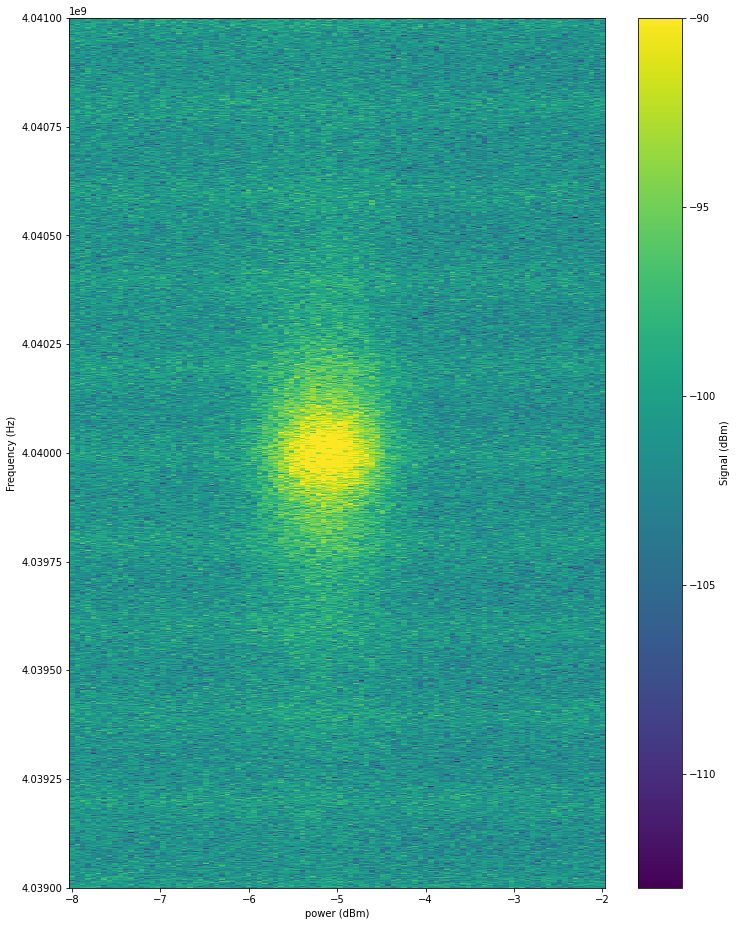

In [56]:
fig, ax1 = plt.subplots(figsize=(12,16))

ctf = ax1.pcolormesh(mw_pwr_0V, freq_0V, pwr_0V, shading='auto', vmax= -90)
fig.colorbar(ctf, label='Signal (dBm)')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('power (dBm)')
fig.savefig("spectrum_analyzer_f4.04Ghz_DC0V.png")
# ax1.set_ylim([0,3])

In [47]:
sspec_185V = spec_185V['signal_hound2_trace'].reset_index()
pwr_185V = sspec_185V['signal_hound2_trace'].to_numpy()
freq_185V =  sspec_185V['signal_hound2_frequency'].to_numpy()
mw_pwr_185V = sspec_185V['mw_source_power'].to_numpy()


m_size = ( np.unique(mw_pwr_185V).size, np.unique(np.round_(freq_185V, decimals = 3)).size)

pwr_185V = np.reshape(pwr_185V, m_size)
freq_185V = np.reshape(freq_185V, m_size)
mw_pwr_185V = np.reshape(mw_pwr_185V, m_size)


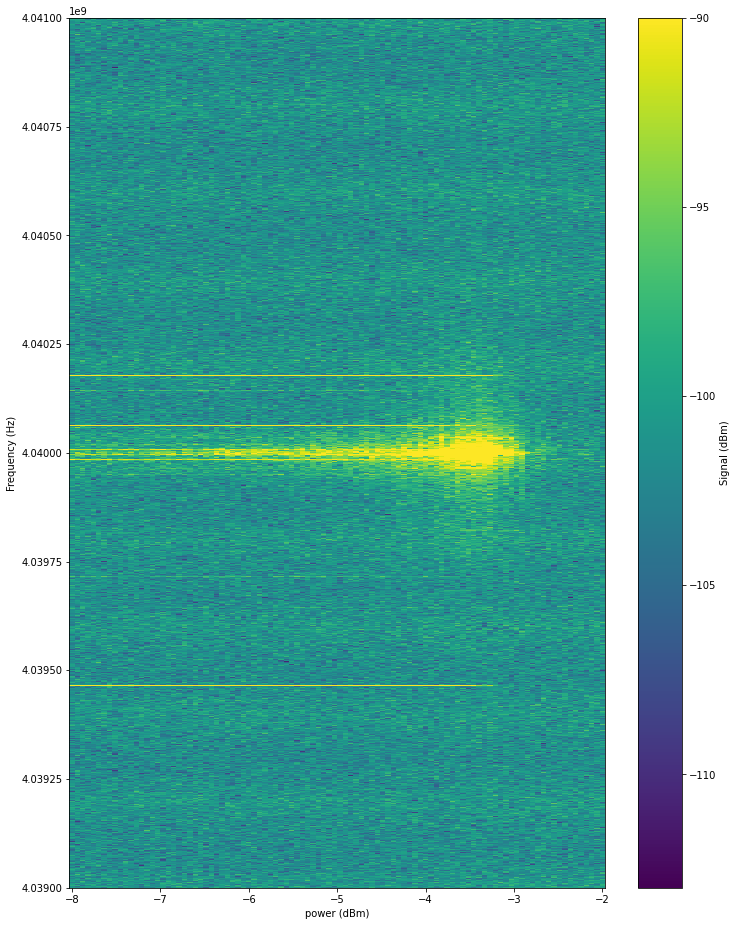

In [57]:
fig, ax1 = plt.subplots(figsize=(12,16))

ctf = ax1.pcolormesh(mw_pwr_185V, freq_185V, pwr_185V, shading='auto', vmax= -90)
fig.colorbar(ctf, label='Signal (dBm)')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('power (dBm)')
fig.savefig("spectrum_analyzer_f4.04Ghz_DC_onstep_1.85V.png")
# ax1.set_ylim([0,3])

In [52]:
sspec_17V = spec_17V['signal_hound2_trace'].reset_index()
pwr_17V = sspec_17V['signal_hound2_trace'].to_numpy()
freq_17V =  sspec_17V['signal_hound2_frequency'].to_numpy()
mw_pwr_17V = sspec_17V['mw_source_power'].to_numpy()


m_size = ( np.unique(mw_pwr_17V).size, np.unique(np.round_(freq_17V, decimals = 3)).size)

pwr_17V = np.reshape(pwr_17V, m_size)
freq_17V = np.reshape(freq_17V, m_size)
mw_pwr_17V = np.reshape(mw_pwr_17V, m_size)


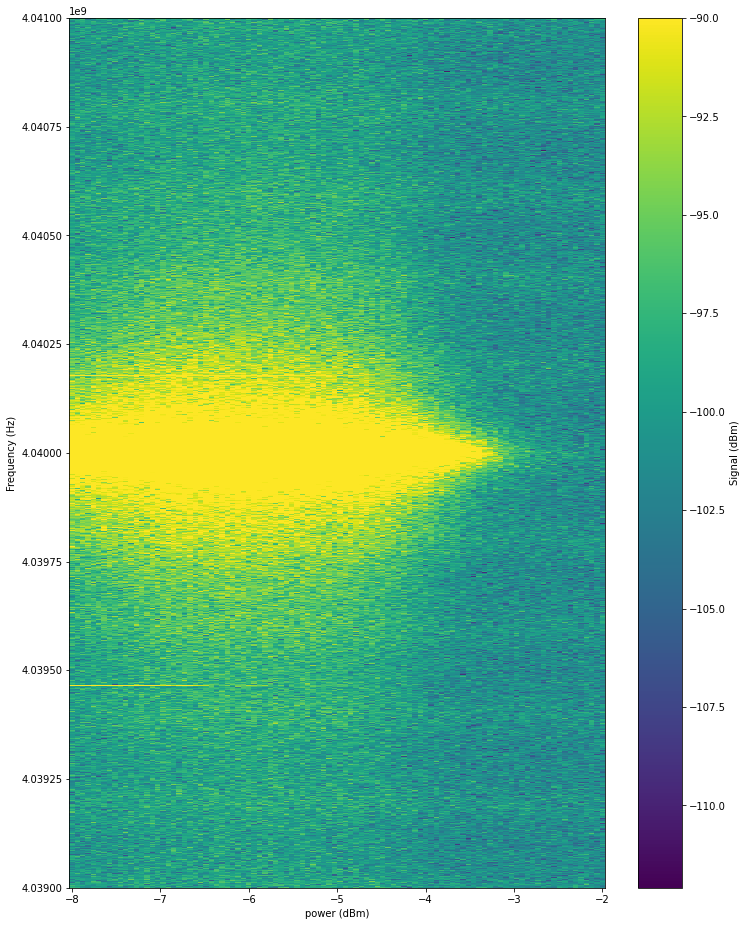

In [58]:
fig, ax1 = plt.subplots(figsize=(12,16))

ctf = ax1.pcolormesh(mw_pwr_17V, freq_17V, pwr_17V, shading='auto', vmax= -90)
fig.colorbar(ctf, label='Signal (dBm)')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('power (dBm)')
fig.savefig("spectrum_analyzer_f4.04Ghz_DC_beforestep_1.7V.png")
# ax1.set_ylim([0,3])

In [54]:
sspec_205V = spec_205V['signal_hound2_trace'].reset_index()
pwr_205V = sspec_205V['signal_hound2_trace'].to_numpy()
freq_205V =  sspec_205V['signal_hound2_frequency'].to_numpy()
mw_pwr_205V = sspec_205V['mw_source_power'].to_numpy()


m_size = ( np.unique(mw_pwr_205V).size, np.unique(np.round_(freq_205V, decimals = 3)).size)

pwr_205V = np.reshape(pwr_205V, m_size)
freq_205V = np.reshape(freq_205V, m_size)
mw_pwr_205V = np.reshape(mw_pwr_205V, m_size)


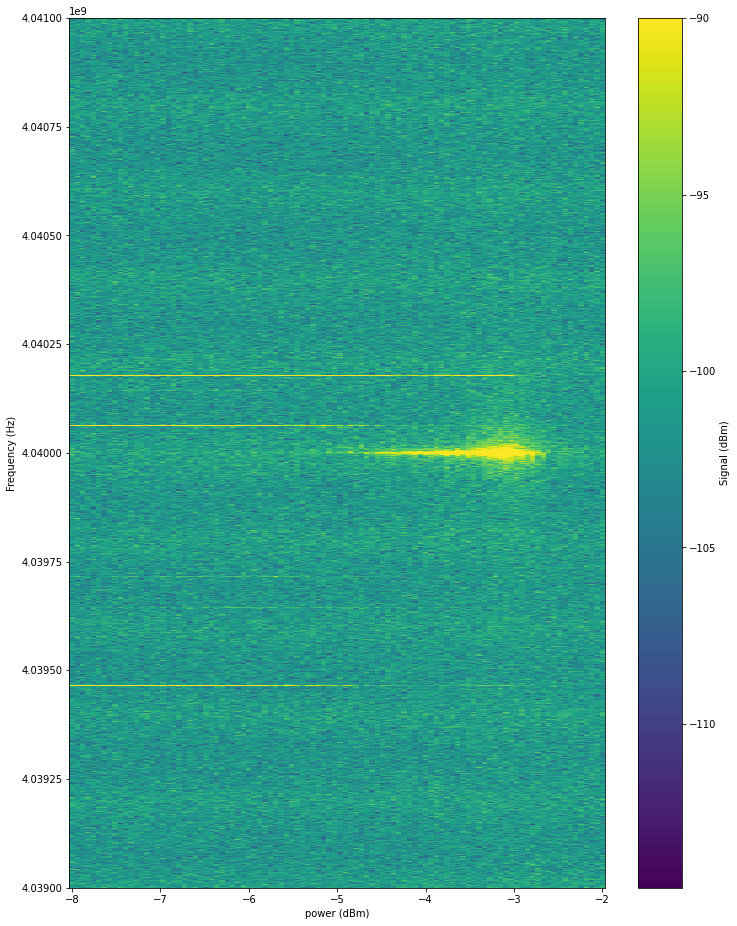

In [59]:
fig, ax1 = plt.subplots(figsize=(12,16))

ctf = ax1.pcolormesh(mw_pwr_205V, freq_205V, pwr_205V, shading='auto', vmax= -90)
fig.colorbar(ctf, label='Signal (dBm)')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('power (dBm)')
fig.savefig("spectrum_analyzer_f4.04Ghz_DC_afterstep_2.05V.png")
# ax1.set_ylim([0,3])

In [38]:
sspec_0V

,mw_source_power,signal_hound2_frequency,signal_hound2_trace
0,-8.0,4.039000e+09,-101.088162
1,-8.0,4.039000e+09,-99.912815
2,-8.0,4.039000e+09,-101.254221
3,-8.0,4.039000e+09,-101.256275
4,-8.0,4.039000e+09,-99.933866
...,...,...,...
3370195,-2.0,4.041000e+09,-98.619676
3370196,-2.0,4.041000e+09,-100.004688
3370197,-2.0,4.041000e+09,-99.353276
3370198,-2.0,4.041000e+09,-99.760294


In [37]:
np.unique(mw_pwr_0V).size

100

In [36]:
np.unique(np.round_(freq_0V, decimals = 2)).size

33702

(0.0, 3.0)

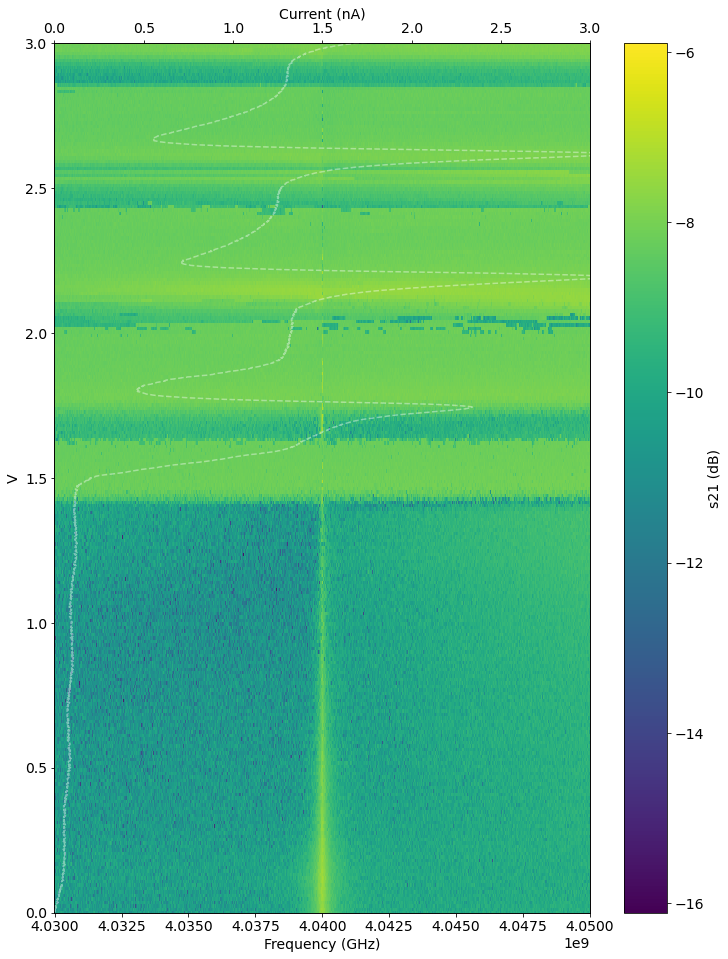

In [17]:
fig, ax1 = plt.subplots(figsize=(12,16))
voltage_scaling = 1e3
voltage_offset = 0.05
current_scaling = 1e9

ctf = ax1.pcolormesh(frq, v_bias, np.log(mag), shading='auto')
fig.colorbar(ctf, label='s21 (dB)')
ax1.set_ylabel('V')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylim([0,3])

ax2 =ax1.twiny()
ax2.plot(current_scaling*np.abs(i_up), voltage_scaling*v_up - voltage_offset, 'w--', alpha=0.4)
ax2.set_xlabel('Current (nA)');
ax2.set_xlim([0,3])

# plt.savefig('s21_dc_steps.png')

<h4>Pump syncing VS Flux</h4>

In [5]:
RUN_ID = 84
dataset = qc.load_by_run_spec(captured_run_id=RUN_ID)
vnadc_vna_dict = dataset.to_pandas_dataframe_dict()

In [8]:
# VNA spectra
vnadc_vna_0 = vnadc_vna_dict['ZNB20_S21_magnitude']
vnadc_vna_1 = vnadc_vna_0.reset_index()

frq = vnadc_vna_1['ZNB20_S21_S21_frequency'].to_numpy()
flux = vnadc_vna_1['current_source_current'].to_numpy()
mag = vnadc_vna_1['ZNB20_S21_magnitude'].to_numpy()

m_size = (-1, np.unique(frq).size)
frq = np.reshape(frq, m_size)
flux = np.reshape(flux, m_size)
mag = np.reshape(mag, m_size)

Text(0.5, 0, 'Frequency (GHz)')

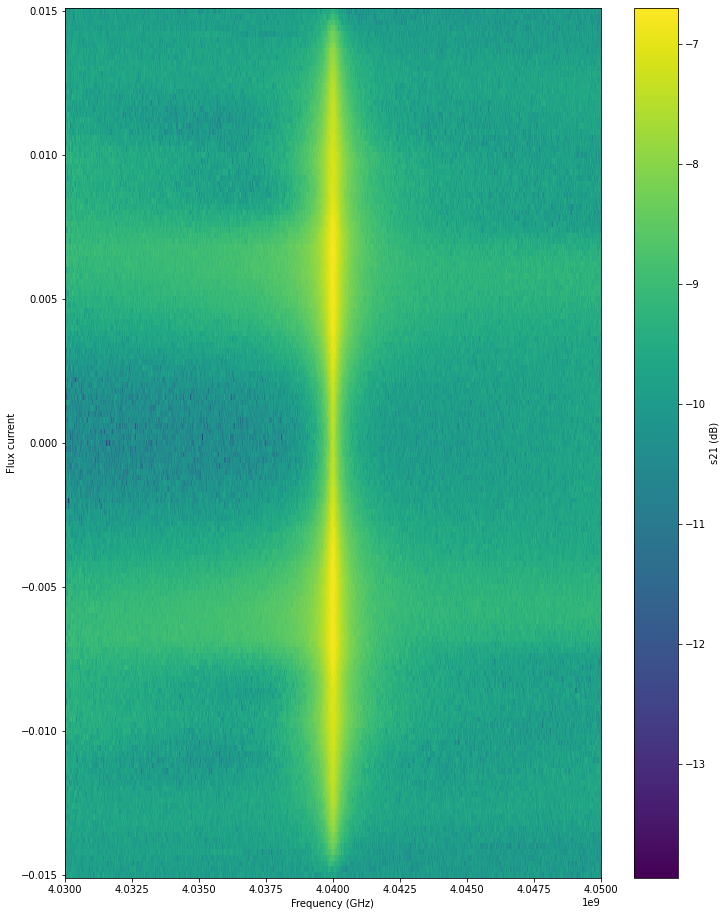

In [10]:
fig, ax1 = plt.subplots(figsize=(12,16))

ctf = ax1.pcolormesh(frq, flux, np.log(mag), shading='auto')
fig.colorbar(ctf, label='s21 (dB)')
ax1.set_ylabel('Flux current')
ax1.set_xlabel('Frequency (GHz)')